In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from tqdm import tqdm
import imageio
import time

## Color Images

In [145]:
MAX_COLORS = 1000
cmap = 'Spectral'
IMG_HEIGHT = 50
IMG_WIDTH = 500

 13%|██████████▏                                                                   | 1066/8192 [01:10<07:51, 15.11it/s]


KeyboardInterrupt: 

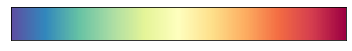

In [146]:
fig = plt.figure()

for nmb_colors in tqdm(range(1,MAX_COLORS+1,1)):
    p = os.path.join('static', 'colors', f'{nmb_colors}.png')
    gradient = np.linspace(1, 0, nmb_colors)
    gradient = np.expand_dims(gradient, axis=0)
    gradient = cv2.resize(gradient, dsize=(IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_NEAREST)

    ax = plt.gca()
    
    ax.imshow(gradient, cmap=cmap)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.savefig(p, bbox_inches='tight')
    plt.cla()
plt.close()


## Rotation Images

In [147]:
MAX_ROTATIONS = 360
SECONDS = 4
DPI = 100

 32%|█████████████████████████▊                                                      | 116/360 [18:25<38:45,  9.53s/it]


KeyboardInterrupt: 

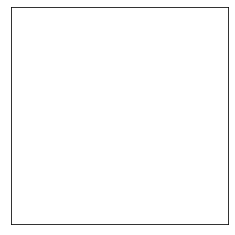

In [148]:
from scipy.ndimage import rotate
img = cv2.imread('static/shapes/Gelato.png',0)
h, w = img.shape

fig = plt.figure(frameon=False)
ax = fig.gca()
p = os.path.join('static', 'rotations', 'images')

if not os.path.exists(p):
    os.mkdir(p)

for nmb_rotations in tqdm(range(1,MAX_ROTATIONS+1,1)):
    angles = np.linspace(0, 360, nmb_rotations+1)[:-1]

    paths = []
    for i,angle in enumerate(angles):
        tmp_p = os.path.join(p, f'{i}.png')
        paths.append(tmp_p)
        ax = fig.gca()
        
        img2 = rotate(img, angle)
        new_h, new_w = img2.shape
        padh = int((new_h-h)/2)
        padw = int((new_w-w)/2)
        if padh>0 and padw>0:
            img2 = img2[padh:-padh,padw:-padw]

        ax.imshow(img2, cmap='gray')
        
        ax.set_aspect('equal')
        ax.set_axis_off()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.savefig(tmp_p, dpi=DPI)
        ax.clear()


    path_gif_out = os.path.join('static', 'rotations', 'gifs', f'{nmb_rotations}.gif')

    imgs_in = []
    for filename in paths:
        image = imageio.imread(filename)
        imgs_in.append(image)

    imageio.mimwrite(path_gif_out, imgs_in, fps=len(angles)/SECONDS)


    for filename in os.listdir(p):
        os.remove(os.path.join(p,filename))
os.rmdir(p)


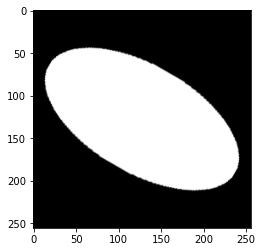

In [108]:


img2 = rotate(img, 60)
new_h, new_w = img2.shape
padh = int((new_h-h)/2)
padw = int((new_w-w)/2)
if padh>0 and padw>0:
    img2 = img2[padh:-padh,padw:-padw]

plt.imshow(img2, cmap='gray')

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [07:14<00:00,  4.34s/it]


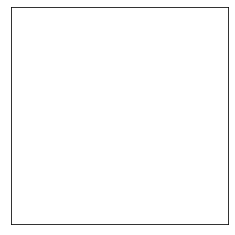

In [5]:
fig = plt.figure(frameon=False)
ax = fig.gca()
p = os.path.join('static', 'rotations', 'images')

if not os.path.exists(p):
    os.mkdir(p)

for nmb_rotations in tqdm(range(1,MAX_ROTATIONS+1,1)):
    angles = np.linspace(0, 2*np.pi, nmb_rotations+1)[:-1]
    xs = np.sin(angles)
    ys = np.cos(angles)

    paths = []
    for i,(x,y) in enumerate(zip(xs,ys)):
        tmp_p = os.path.join(p, f'{i}.png')
        paths.append(tmp_p)
        ax = fig.gca()
        circle = plt.Circle((0, 0), 1, color='black', fill=False)
        ax.add_patch(circle)
        ax.plot([0,x],[0,y])
        plt.xlim(-1.1,1.1)
        plt.ylim(-1.1,1.1)
        ax.set_aspect('equal')
        ax.set_axis_off()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.savefig(tmp_p, dpi=DPI)
        ax.clear()


    path_gif_out = os.path.join('static', 'rotations', 'gifs', f'{nmb_rotations}.gif')

    imgs_in = []
    for filename in paths:
        image = imageio.imread(filename)
        imgs_in.append(image)

    imageio.mimwrite(path_gif_out, imgs_in, fps=len(angles)/SECONDS)


    for filename in os.listdir(p):
        os.remove(os.path.join(p,filename))
os.rmdir(p)

## Image size

In [154]:
img_sizes = [32, 64, 128, 256, 512]
MAX_SIZE = max(img_sizes)
eps = 10
DPI = 500

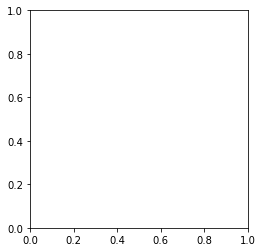

In [155]:
from matplotlib.patches import Rectangle

fig = plt.figure()

for img_size in img_sizes:
    p = os.path.join('static', 'sizes', f'{img_size}.png')
    
    ax = fig.gca()
    plt.xlim(-eps,MAX_SIZE+eps)
    plt.ylim(-eps,MAX_SIZE+eps)
    ax.set_aspect('equal')
    ax.set_axis_off()
    small_rect = Rectangle((0, 0), img_size, img_size, fill=True, color='black')
    ax.add_patch(small_rect)
    
    
    max_rect = Rectangle((0, 0), MAX_SIZE, MAX_SIZE, edgecolor='lightgray', fill=False, linestyle='--', linewidth=4.0)
    ax.add_patch(max_rect)
    plt.savefig(p, dpi=DPI)
    ax.clear()

## Shapes

In [81]:
FRAME_PERC = 0.1
SELECT_COLOR = (200,200,200) # RGB

p = os.path.join('static','shapes')


for f in os.listdir(p):
    img = cv2.imread(os.path.join(p,f))

    h,w,_ = img.shape
    frame_w = int(FRAME_PERC*w)
    frame_h = int(FRAME_PERC*h)

    new_img = (np.ones((h+2*frame_h,w+2*frame_w,3))).astype(np.uint8)
    new_img[:,:,0] *= SELECT_COLOR[2]
    new_img[:,:,1] *= SELECT_COLOR[1]
    new_img[:,:,2] *= SELECT_COLOR[0]

    new_img[frame_h:-frame_h, frame_w:-frame_w,:] = img

    new_img = cv2.resize(new_img, (w,h))
    cv2.imwrite(os.path.join(p, f'checked_{f}'), new_img)

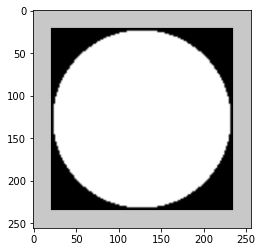

In [80]:
plt.imshow(new_img)

## Scales for Shapes

In [12]:
import sys
sys.path.insert(0,'..')
from dsprites.masks import SHAPES
from itertools import count
import os
import json

In [13]:

shape_dict = {
    'Rectangle' : SHAPES[0],
    'Square' : SHAPES[1],
    'Circle' : SHAPES[2],
    'Gelato' : SHAPES[3],
    'Pyramid' : SHAPES[4],
    'Ellipse' : SHAPES[5],
    'Moon' : SHAPES[6]
}
shapes = shape_dict.keys()
max_size = 256**2


p_dir = os.path.join('static', 'scales')
res = {}
for shape in shapes:
    res[shape] = []
    s = shape_dict[shape]
    for size in count(start=s.min_size, step=s.min_step):
        mask = s.create(size)
        area = int(np.prod(mask.shape))
        
        if area>max_size:
            break
        else:
            res[shape].append(area)

In [14]:
json.dumps(res)

'{"Rectangle": [225, 361, 625, 841, 1089, 1369, 1681, 2209, 2601, 3025, 3481, 4225, 4761, 5329, 5929, 6889, 7569, 8281, 9025, 10201, 11025, 11881, 12769, 13689, 15129, 16129, 17161, 18225, 19881, 21025, 22201, 23409, 25281, 26569, 27889, 29241, 31329, 32761, 34225, 35721, 37249, 39601, 41209, 42849, 44521, 47089, 48841, 50625, 52441, 55225, 57121, 59049, 61009, 64009], "Square": [225, 361, 441, 625, 729, 841, 1089, 1225, 1521, 1681, 2025, 2209, 2401, 2809, 3025, 3481, 3721, 3969, 4489, 4761, 5329, 5625, 5929, 6561, 6889, 7569, 7921, 8649, 9025, 9409, 10201, 10609, 11449, 11881, 12321, 13225, 13689, 14641, 15129, 16129, 16641, 17161, 18225, 18769, 19881, 20449, 21025, 22201, 22801, 24025, 24649, 25281, 26569, 27225, 28561, 29241, 30625, 31329, 32041, 33489, 34225, 35721, 36481, 37249, 38809, 39601, 41209, 42025, 43681, 44521, 45369, 47089, 47961, 49729, 50625, 51529, 53361, 54289, 56169, 57121, 59049, 60025, 61009, 63001, 64009], "Circle": [225, 289, 361, 441, 529, 625, 729, 841, 961, 1

## Config

In [142]:
import json
with open('static/config.json', 'r') as fp:
    data = json.load(fp)